## Predicting All-NBA Selections

### By: Aaron Dzaboff

## Required Packages

In [1]:
# ! pip install -U scikit-learn
# ! pip install pandas
# ! python -m pip install -U matplotlib

## Importing Modules

In [2]:
import pandas as pd                                       
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans                        
from sklearn.model_selection import train_test_split      
from sklearn.neighbors import KNeighborsClassifier        
from sklearn.linear_model import LogisticRegression       
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from operator import itemgetter

## Importing data sets and creating pandas dataframe

In [3]:
df_historical = pd.read_csv("historical-all-nba.csv")
df_current = pd.read_excel("2019_2020_stats.xlsx")

In [4]:
df_historical.head()

,Player,Tm,MP,PTS,TRB,AST,STL,BLK,FG_perc,3pt_perc,FT_perc,WS,VORP,BPM,All_NBA,All_Star
0,George Gervin,SAS,37.6,33.1,5.2,2.6,1.4,1.0,0.528,0.314,0.852,10.6,3.1,2.2,1,1
1,Eddie Johnson,ATL,33.2,18.5,2.5,4.7,1.5,0.3,0.487,0.385,0.828,8.2,2.8,2.2,0,1
2,Moses Malone,HOU,38.3,25.8,14.5,1.8,1.0,1.3,0.502,0.000,0.719,11.9,3.8,2.8,1,1
3,Julius Erving,PHI,36.1,26.9,7.4,4.6,2.2,1.8,0.519,0.200,0.787,12.5,6.5,7.2,1,1
4,John Drew,ATL,28.8,19.5,5.9,1.3,1.1,0.3,0.453,0.000,0.757,6.4,0.8,-0.7,0,1


In [5]:
df_current.head()

,Player,Tm,MP,PTS,TRB,AST,STL,BLK,FG_perc,3pt_perc,FT_perc,WS,VORP,BPM,All_Star
0,Steven Adams,OKC,27.0,10.7,9.3,2.6,0.7,1.1,0.585,0.000,0.592,4.9,2.1,4.4,0
1,Bam Adebayo,MIA,34.5,15.8,10.4,4.9,1.2,1.2,0.579,0.091,0.681,7.1,3.3,5.1,1
2,LaMarcus Aldridge,SAS,33.2,19.1,7.6,2.4,0.6,1.6,0.501,0.407,0.830,4.6,1.6,1.8,0
3,Nickeil Alexander-Walker,NOP,12.2,5.1,2.0,1.8,0.3,0.2,0.339,0.342,0.607,-0.4,-0.5,-6.1,0
4,Grayson Allen,MEM,16.6,7.4,2.2,1.4,0.2,0.0,0.449,0.363,0.857,0.7,-0.2,-3.4,0


## Visualizing All-NBA Selections

In [6]:
all_nba = df_historical[df_historical.All_NBA == 1]
non_all_nba = df_historical[df_historical.All_NBA == 0]

Text(0.5, 0.98, 'PPG, VORP, and All-NBA Selections')

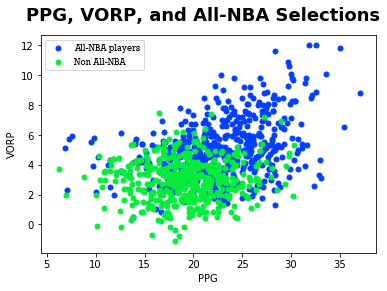

In [7]:
plt.style.use("seaborn-bright")

ppg_all_nba,ax = plt.subplots()

ax.scatter(all_nba['PTS'], all_nba['VORP'], label = "All-NBA players", s = 25)
ax.scatter(non_all_nba['PTS'], non_all_nba['VORP'], label = "Non All-NBA", s = 25)

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

ax.set_xlabel('PPG')
ax.set_ylabel('VORP')

ppg_all_nba.suptitle("PPG, VORP, and All-NBA Selections", weight = 'bold', size = 18)

Text(0.5, 0.98, 'WS, BPM, and All-NBA Selections')

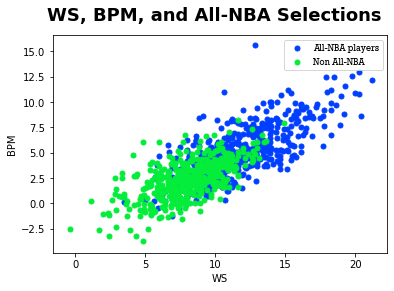

In [8]:
plt.style.use("seaborn-bright")

ws_vorp,ax = plt.subplots()

ax.scatter(all_nba['WS'], all_nba['BPM'], label = "All-NBA players", s = 25)
ax.scatter(non_all_nba['WS'], non_all_nba['BPM'], label = "Non All-NBA", s = 25)

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

ax.set_xlabel('WS')
ax.set_ylabel('BPM')

ws_vorp.suptitle("WS, BPM, and All-NBA Selections", weight = 'bold', size = 18)

Text(0.5, 0.98, 'PPG Histogram')

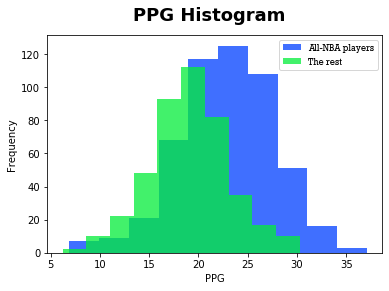

In [9]:
ppg_hist, ax = plt.subplots()

ax.hist(all_nba['PTS'], alpha = .75, label = 'All-NBA players')
ax.hist(non_all_nba['PTS'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

ax.set_xlabel('PPG')
ax.set_ylabel('Frequency')

ppg_hist.suptitle("PPG Histogram", weight = 'bold', size = 18)

Text(0.5, 0.98, 'WS Histogram')

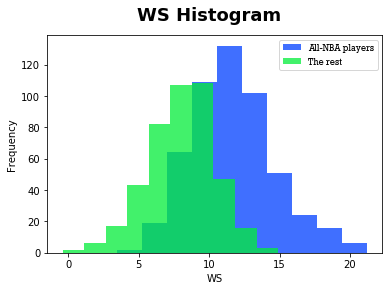

In [10]:
ws_hist, ax = plt.subplots()

ax.hist(all_nba['WS'], alpha = .75, label = 'All-NBA players')
ax.hist(non_all_nba['WS'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

ax.set_xlabel('WS')
ax.set_ylabel('Frequency')

ws_hist.suptitle("WS Histogram", weight = 'bold', size = 18)

Text(0.5, 0.98, 'VORP Histogram')

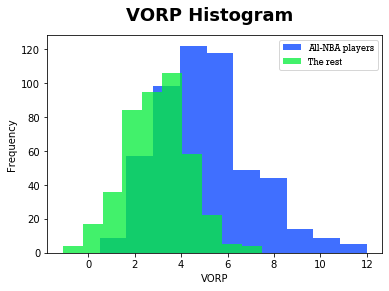

In [11]:
vorp_hist, ax = plt.subplots()

ax.hist(all_nba['VORP'], alpha = .75, label = 'All-NBA players')
ax.hist(non_all_nba["VORP"], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

ax.set_xlabel('VORP')
ax.set_ylabel('Frequency')

vorp_hist.suptitle("VORP Histogram", weight = 'bold', size = 18)

## Preparing data for modeling

In [12]:
features = df_historical[["MP","PTS","TRB","AST","STL","BLK","WS","VORP","BPM","All_Star"]]
target = df_historical["All_NBA"]

In [13]:
X = features
y = target

In [14]:
#Splitting data into training set and test set using just historical data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Modeling with k-Nearest Neighbors(k-NN)

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
knn.score(X_train, y_train)

0.8326359832635983

In [40]:
knn.score(X_test, y_test) 

0.7656903765690377

## Modeling with Logistic Regression

In [41]:
lr = LogisticRegression(solver="liblinear")
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
lr.score(X_train, y_train)

0.796373779637378

In [43]:
lr.score(X_test, y_test)

0.799163179916318

## Modeling with Linear Support Vector Machines (SVMs)

In [44]:
svm = LinearSVC()
svm.fit(X_train, y_train)

C:\Users\aaron\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [45]:
svm.score(X_train, y_train)

0.6722454672245467

In [46]:
svm.score(X_test, y_test)

0.6317991631799164

## Modeling with Kernelized Support Vector Machines (SVMs)

In [47]:
ksvm = SVC(C=1.0, kernel="rbf", gamma="auto")
ksvm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
ksvm.score(X_train, y_train)

0.9079497907949791

In [49]:
ksvm.score(X_test, y_test)

0.7656903765690377

## Modeling with Neural Networks

In [50]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ), random_state=0)
mlp.fit(X_train, y_train)

C:\Users\aaron\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [51]:
mlp.score(X_train, y_train)

0.8145048814504882

In [52]:
mlp.score(X_test, y_test)

0.8200836820083682

## Prediction

In [53]:
df_current_predict = df_current[["MP","PTS","TRB","AST","STL","BLK","WS","VORP","BPM","All_Star"]]
df_current_names = df_current.iloc[:, 0]

In [63]:
proba = knn.predict_proba(df_current_predict)
pos_proba = proba[:, 1]
combined_list = [[i, j] for i, j in zip(df_current_names, pos_proba)]
combined_list = sorted(combined_list, key = itemgetter(1),  reverse = True)

for i in combined_list[:15]:
    print(i)

['Joel Embiid', 1.0]
['LeBron James', 1.0]
['Giannis Antetokounmpo', 0.8]
['Luka Dončić', 0.8]
['James Harden', 0.8]
['Damian Lillard', 0.8]
['Anthony Davis', 0.6]
['Nikola Jokić', 0.6]
['Ben Simmons', 0.6]
['Karl-Anthony Towns', 0.6]
['Hassan Whiteside', 0.6]
['Bradley Beal', 0.4]
['Jimmy Butler', 0.4]
['Andre Drummond', 0.4]
['Rudy Gobert', 0.4]


In [64]:
proba = lr.predict_proba(df_current_predict)
pos_proba = proba[:, 1]
combined_list = [[i, j] for i, j in zip(df_current_names, pos_proba)]
combined_list = sorted(combined_list, key = itemgetter(1),  reverse = True)

for i in combined_list[:15]:
    print(i)

['Giannis Antetokounmpo', 0.9895596886322698]
['Karl-Anthony Towns', 0.9852845221931213]
['James Harden', 0.9836514347814994]
['Kyrie Irving', 0.9657200662564308]
['Luka Dončić', 0.9538269102564345]
['Hassan Whiteside', 0.9432203116656583]
['Andre Drummond', 0.9367071989368139]
['Bradley Beal', 0.9256376168074029]
['DeMar DeRozan', 0.9097216570241605]
['LeBron James', 0.9057223613989904]
['Anthony Davis', 0.8896661506502159]
['Nikola Vučević', 0.8845764941874368]
['Damian Lillard', 0.8749810505799501]
['Paul George', 0.8735121815103353]
['Montrezl Harrell', 0.852193899713158]


In [65]:
proba = mlp.predict_proba(df_current_predict)
pos_proba = proba[:, 1]
combined_list = [[i, j] for i, j in zip(df_current_names, pos_proba)]
combined_list = sorted(combined_list, key = itemgetter(1),  reverse = True)

for i in combined_list[:15]:
    print(i)

['Giannis Antetokounmpo', 0.9963782210926377]
['Andre Drummond', 0.9864645715141046]
['Hassan Whiteside', 0.9840685752903772]
['James Harden', 0.9760176159034486]
['Karl-Anthony Towns', 0.9695801899279338]
['Luka Dončić', 0.9486541917663411]
['DeAndre Jordan', 0.9125105307968292]
['Anthony Davis', 0.8967479150459434]
['Clint Capela', 0.8852889205014345]
['Jonas Valančiūnas', 0.8720650042575482]
['LeBron James', 0.8521400866665599]
['Kyrie Irving', 0.8445658042253024]
['Nikola Vučević', 0.8320080751537197]
['Jarrett Allen', 0.8202431115966685]
['Damian Lillard', 0.8173798423274387]
